In [1]:
from ep_predictor.predictor_backend import preprocessing, ep_prediction

In [2]:
#Constant Setup
pctg=99
cutout_size=33

#EFM9: binary_threshold=0.04, object_size=3, hole_size=30, m_thresh=0.30
#EFM8: binary_threshold=0.41, object_size=3, hole_size=30, m_thresh=0.778
#EFM7: binary_threshold=0.095, object_size=4, hole_size=15, m_thresh=0.44
#EFVM: binary_threshold=0.05, object_size=2, hole_size=2, m_thresh=0.785

name='efm8'
curves_file=rf'c:\Users\mcano\Code\rawdata\img_data\FHRbact1\Out_GetEpOnpx_2024-4_from_OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\lifts'
topography_file=rf'c:\Users\mcano\Code\rawdata\img_data\FHRbact1\Out_GetEpOnpx_2024-4_from_OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\FlattenTopo_.txt'
ref_file=rf"c:\Users\mcano\Code\rawdata\img_data\FHRbact1\Out_GetEpOnpx_2024-4_from_OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\Map_Ep.txt"
binary_threshold=0.067
object_size=3
hole_size=30
m_ep_thresh=0.3

c:\Users\mcano\Code\FAST\fast_smart_scanning\work_directory\other_examples\ep_predictor\predictor_backend.py:288: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  th=float(mask_ep.quantile(m_ep_thresh))
100%|██████████| 50176/50176 [00:08<00:00, 6031.21it/s]


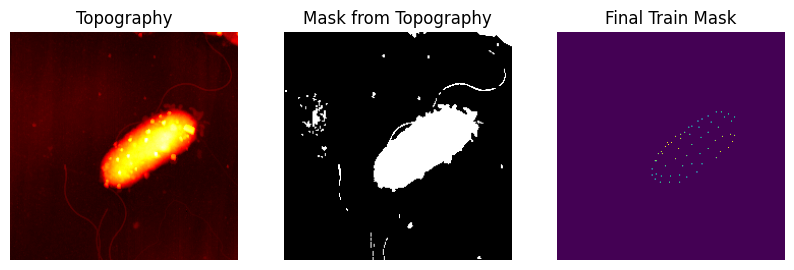

In [3]:
preproc = preprocessing(topography_file, curves_file, ref_file, cutout_size)
preproc.get_mask(binary_threshold, object_size, hole_size, m_ep_thresh)

preproc.get_fc(see_data=0, use_lifts=1)



In [4]:
preproc.get_conv(direct_mask=1)

100%|██████████| 5675/5675 [00:52<00:00, 108.22it/s]


In [5]:
preproc.get_tables(rf'c:\Users\mcano\Code\rawdata\img_data\FHRbact1\Out_GetEpOnpx_2024-4_from_OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\tablas')
preproc.add_tables()

100%|██████████| 360/360 [00:00<00:00, 1552.42it/s]


In [6]:
ep_predict=ep_prediction(preproc,pctg)
ep_predict.train(verb=1)

Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 470798.6875 - mae: 55.1142 - val_loss: 4.0368 - val_mae: 39.8951
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 5.3311 - mae: 34.6499 - val_loss: 1.8654 - val_mae: 13.1573
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 3.7402 - mae: 29.1660 - val_loss: 3.7771 - val_mae: 36.1694
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 5.4787 - mae: 49.5399 - val_loss: 3.4620 - val_mae: 31.4815
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 4.7482 - mae: 40.1079 - val_loss: 2.3595 - val_mae: 17.6474
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 2.5829 - mae: 17.7179 - val_loss: 0.5115 - val_mae: 4.2759
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.5149 - mae: 4.6325 - val_loss: 0.3262 - val_mae: 3.6647
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.3236 - mae: 3.9342 - val_loss: 0.2441 - val_mae: 3.4526
Epoch 9/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 

178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
<function structural_similarity at 0x000001C742010720>


c:\Users\mcano\Code\FAST\fast_smart_scanning\work_directory\other_examples\ep_predictor\predictor_backend.py:419: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  full_vec_roi[i]=y.iloc[i]
c:\Users\mcano\Code\FAST\fast_smart_scanning\work_directory\other_examples\ep_predictor\predictor_backend.py:464: RuntimeWarning: divide by zero encountered in divide
  error_map_r=(abs(np.subtract(y_mat, full_img_cell))/y_mat)*100
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The error map presents 1 error values > 1 (1.67%)


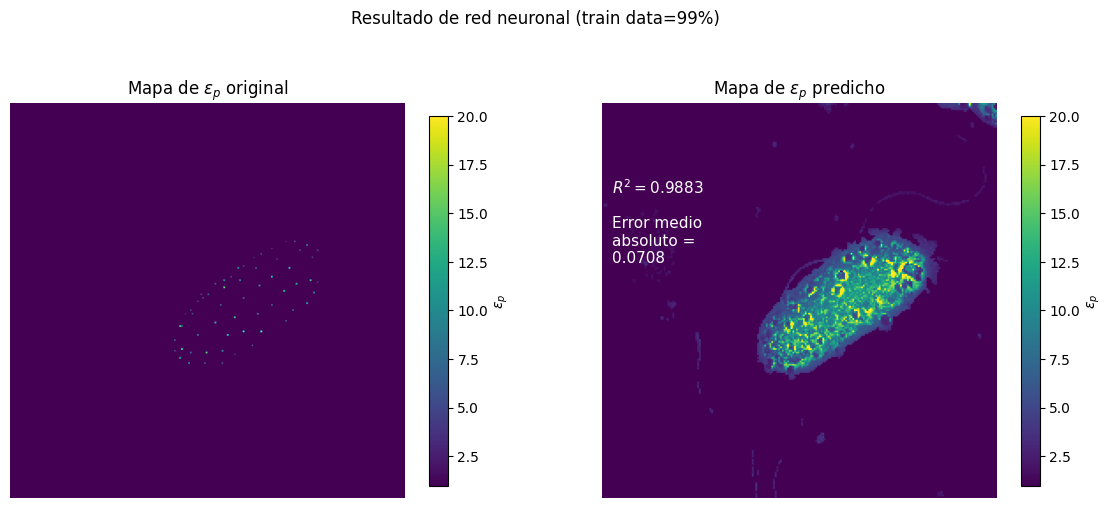

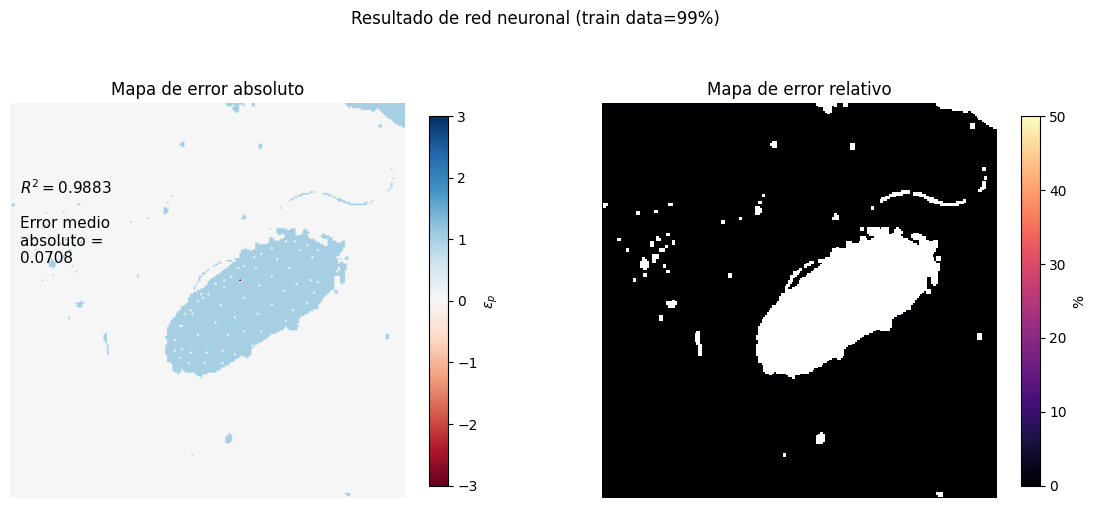

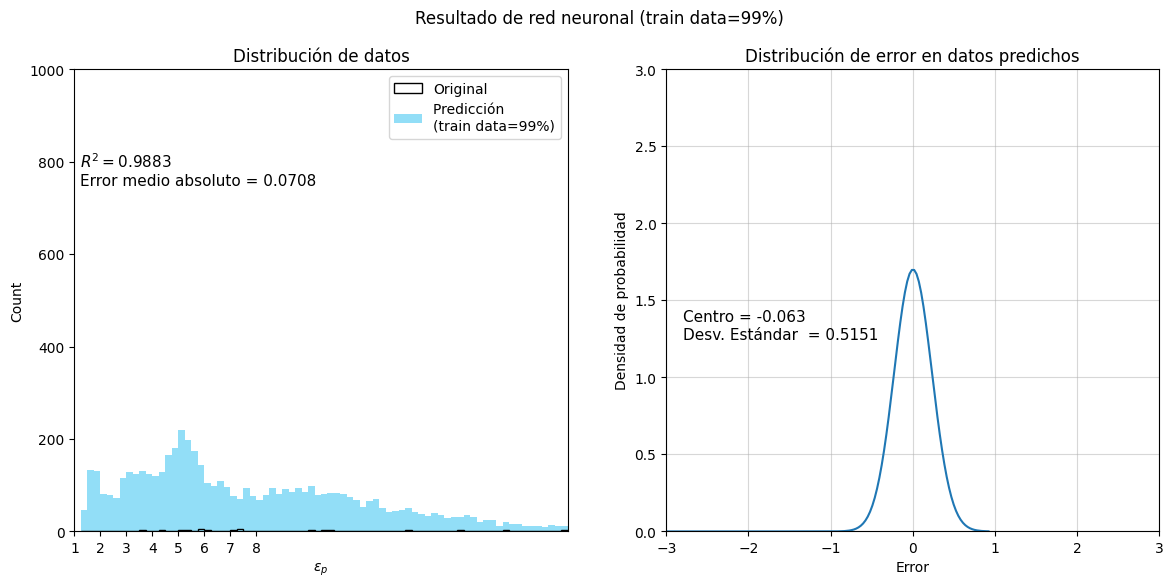

<Figure size 640x480 with 0 Axes>

In [7]:

ep_predict.predict(preproc.fc.x_masked_with_topo_norm,
              preproc.conv.x_cutouts_masked_from_topo)
ep_predict.reconstruct()
ep_predict.display_results(max_v=20)